In [1]:
import numpy
import matplotlib.pyplot as plt
from functions import sigma, sigma_diff, norm_bspline, nurbs_curve

# $\sigma_{m}\left(r, t\right)=\left(max\left[0, r-t\right]\right)^{m}$

In [2]:
x = numpy.linspace(-3, 3, num=1000)

In [3]:
y = sigma(2, x)

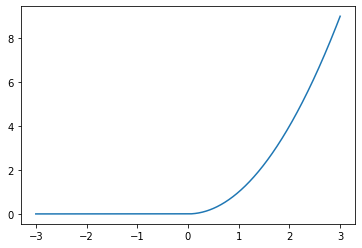

In [4]:
plt.plot(x, y)
plt.show()

# $\sigma_{m-1}\left[t_{0},\dots, t_{m}\right]\left(t\right)=\sum_{j=0}^{m}\frac{\left(t_j-t\right)^{m-1}_{+}}{\prod_{i=1, i\neq j}^{m}\left(t_j-t_i\right)}$

In [5]:
x = numpy.linspace(-3, 3, num=1000)

In [6]:
T = numpy.array([0, 1, 1.5, 2.0, 2.5])

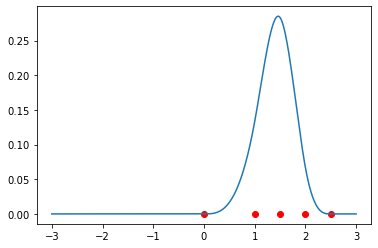

In [7]:
plt.plot(x, sigma_diff(T, x))
plt.scatter(T, numpy.zeros(T.shape[0]), c="red")
plt.show()

# B splines

# $N_{i,m}(t)=\sigma_{m-1}\left[t_i, t_{i+1}, \dots, t_{i+m}\right](t)$

In [8]:
x = numpy.linspace(-6, 6, num=1000)

In [9]:
T = numpy.array([0, 1, 2, 3, 4])

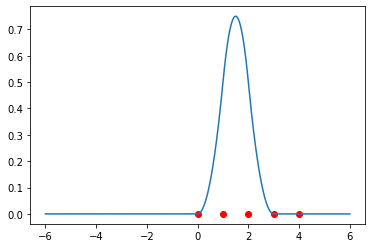

In [10]:
plt.plot(x, norm_bspline(0, 3, T, x))
plt.scatter(T, numpy.zeros(T.shape[0]), c="red")
plt.show()

# Test the correctness of 
# $\sum_{j}N_{i,m}(t)=1$

In [11]:
x = numpy.linspace(-10, 10, num=1000)

In [12]:
T = numpy.arange(-5, 6)

In [13]:
result = numpy.zeros(x.shape[0])

degree = 2

for j in range(T.shape[0] - degree):
    
    result += norm_bspline(j, degree, T, x)

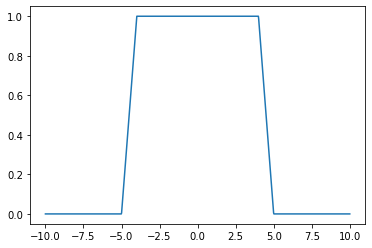

In [14]:
plt.plot(x, result)
plt.show()

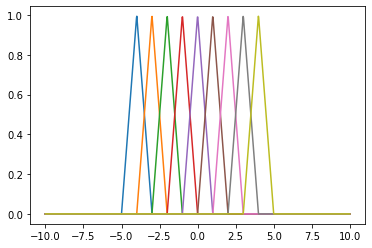

In [15]:
degree = 2

for j in range(T.shape[0]-degree):

    plt.plot(x, norm_bspline(j, degree, T, x))

# NURBS curve
# $r(\bar{t})=\frac{\sum_{i=1}^{n}N_{i, m}(t)\omega_i\bar{P}_i}{\sum_{i=1}^{n}N_{i, m}(t)\omega_i}$

In [16]:
points = numpy.array([
                        [-4, 0],
    
                        [-1, 1],
                        [-0.75, 2],
                        [0.75, 2],
                        [1, 1],
    
                        [4, 0]
                  ])

weights = numpy.ones(points.shape[0])

In [20]:
degree = 4

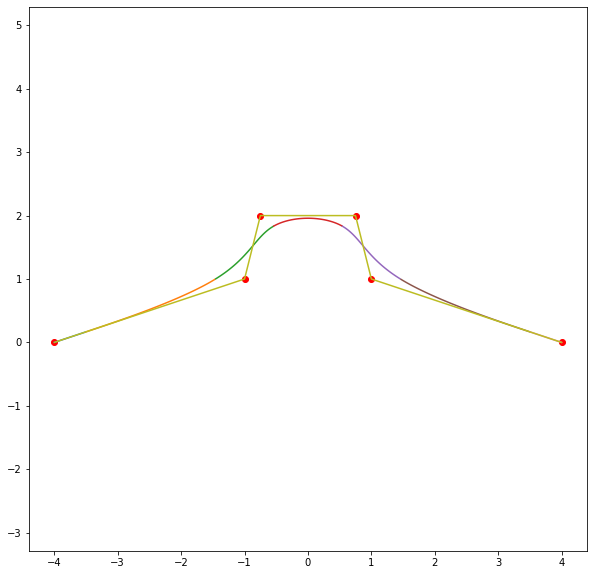

In [21]:
POINTS_nurbs = nurbs_curve(points,                            
                           degree=degree, 
                           split=True)